In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from collections import Counter

In [100]:
cc=pd.read_csv("..\cleaned_data\cleaned_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\munta\AppData\Local\Temp\ipykernel_25304\1565942288.py:1: SyntaxWarning: invalid escape sequence '\c'
  cc=pd.read_csv("..\cleaned_data\cleaned_data.csv")


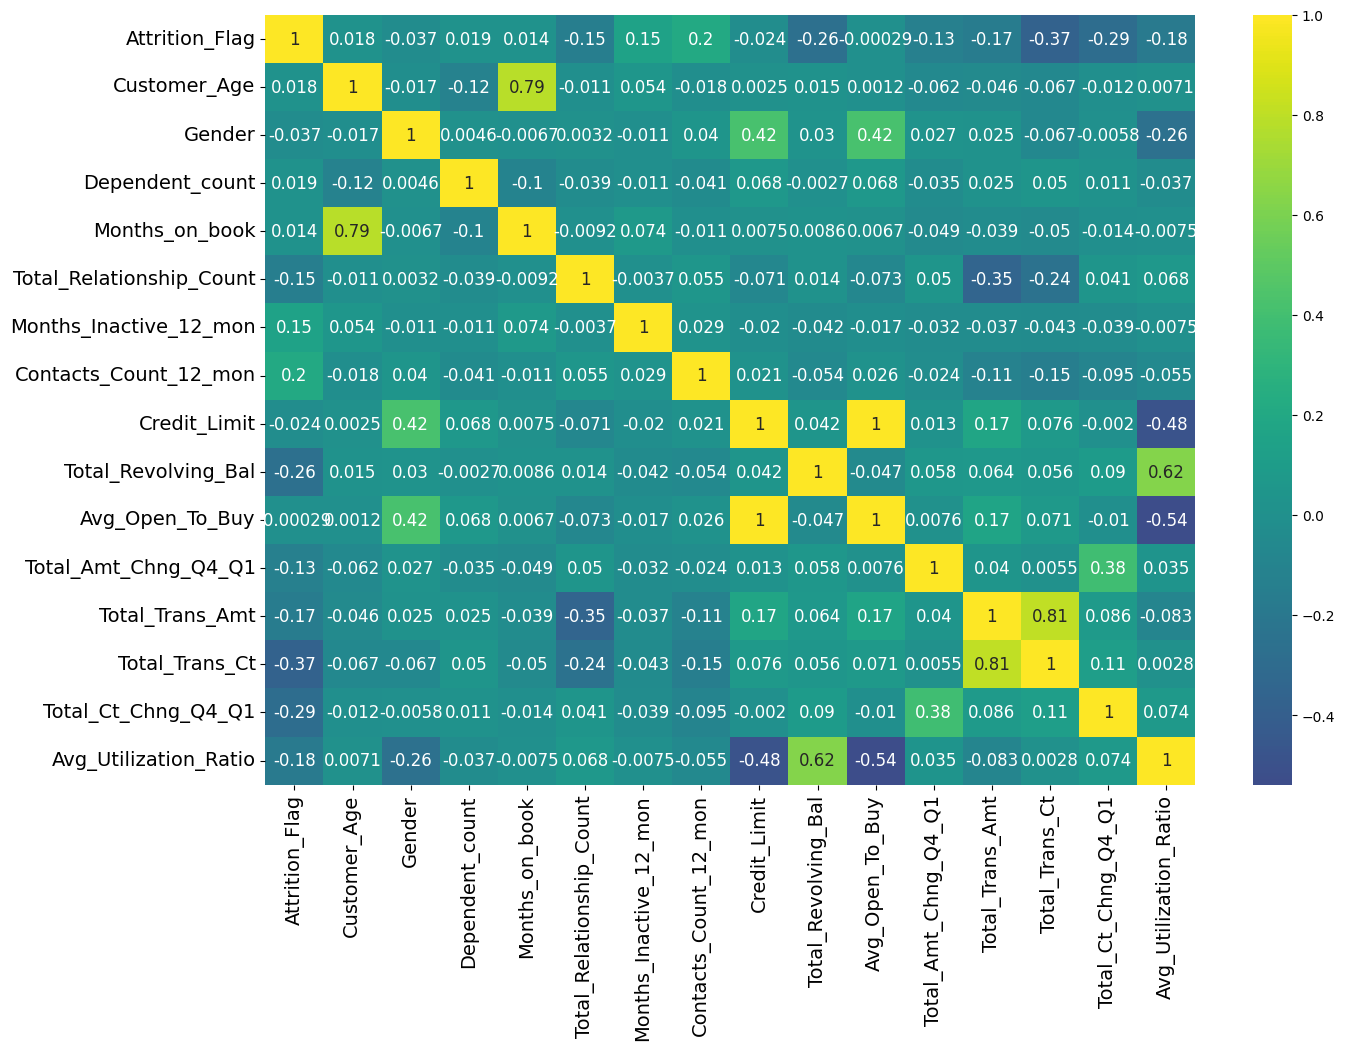

In [101]:
# visualize the correlations between variables using a correlation matrix heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(cc.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

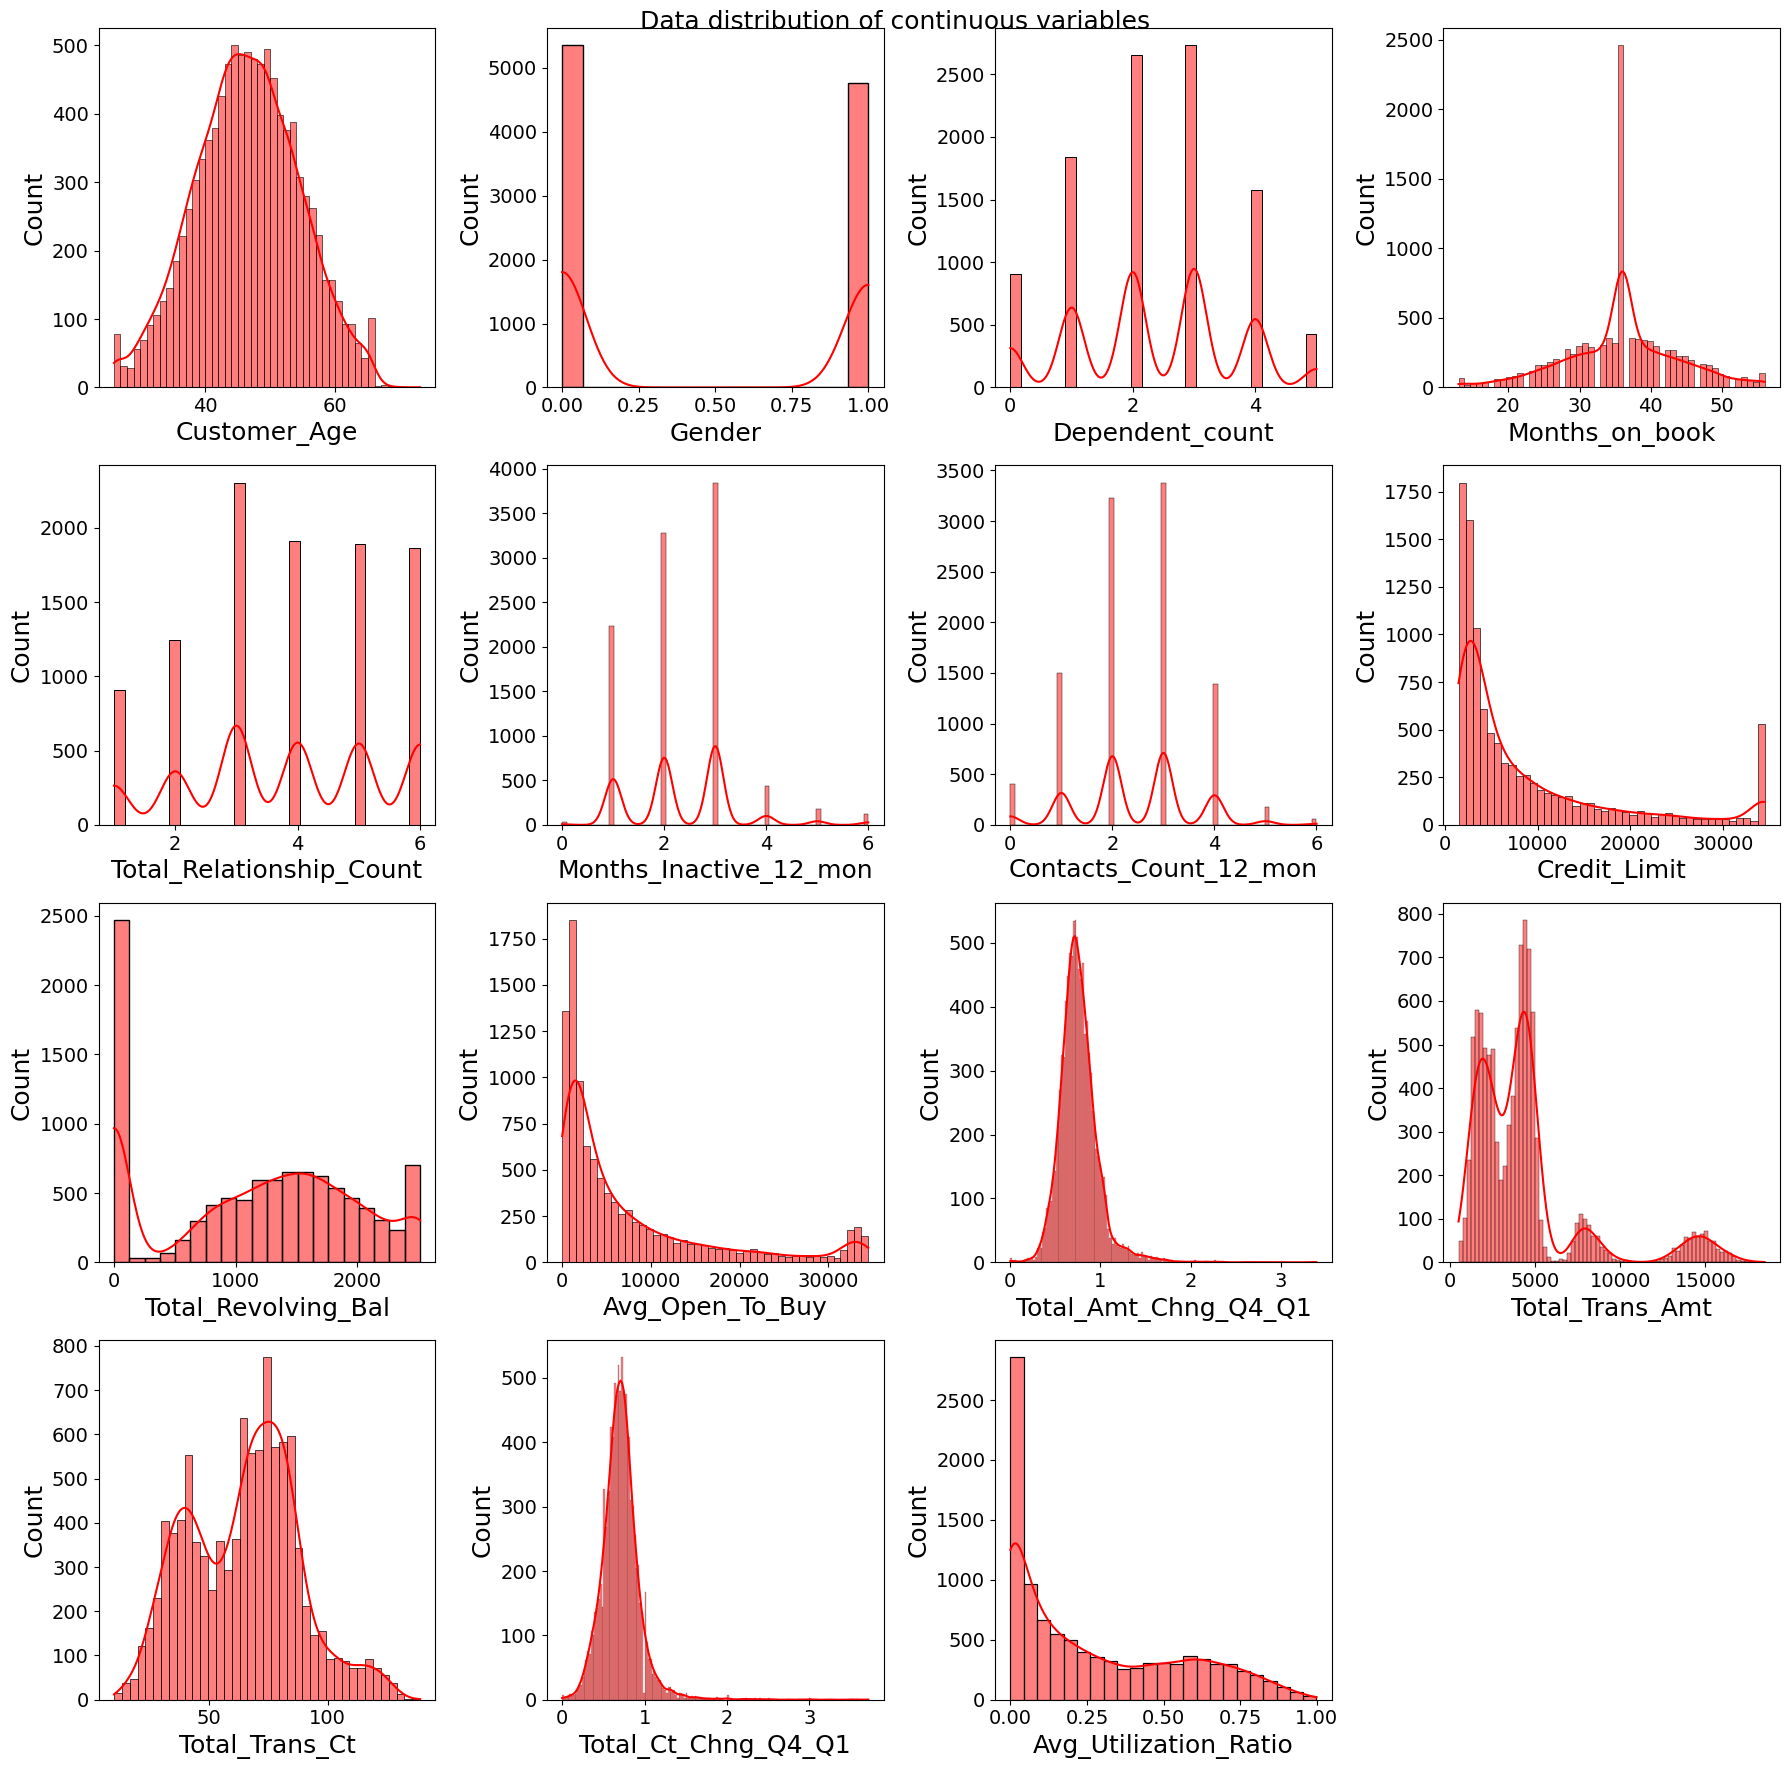

In [102]:
#Exploratory Data Analysis

# As we could see in the data types, we have 13 columns of numerical type.

# In this step, we are checking the distribution of each variable that is continuous.

plt.figure(figsize=(18, 18))
for i, col in enumerate(cc.drop(['Attrition_Flag'], axis=1).select_dtypes(include=['int','float']).columns):
    # We exclude the 'y' column and only consider the columns of numerical type.
    
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4, 4, i+1)  # Creating a subplot for each column.
   
     # Plotting the histogram for each column
    sns.histplot(data=cc, x=col, ax=ax, color='red', kde=True)

    # Plotting the KDE curve with custom color and linewidth
    # Plotting the histogram for each column.
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    
plt.suptitle('Data distribution of continuous variables',fontsize=18)
plt.tight_layout()

In [103]:
# Apply One-Hot Encoding to convert categorical variables into numeric ones

import pandas as pd

cc1 = cc.copy()
cc1 = pd.concat([cc1,pd.get_dummies(cc['Education_Level']).drop(columns=['Unknown'])],axis=1)
cc1 = pd.concat([cc1,pd.get_dummies(cc['Income_Category']).drop(columns=['Unknown'])],axis=1)
cc1 = pd.concat([cc1,pd.get_dummies(cc['Marital_Status']).drop(columns=['Unknown'])],axis=1)
cc1 = pd.concat([cc1,pd.get_dummies(cc['Card_Category']).drop(columns=['Platinum'])],axis=1)
cc1.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)
cc1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,1,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,True,False,True,False,False
1,0,49,0,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,True,True,False,False
2,0,51,1,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,True,False,True,False,False
3,0,40,0,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,True,False,False
4,0,40,1,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,True,False,True,False,False


In [104]:
# making feature matrix and target variable .
X=cc1.drop(['Attrition_Flag'],axis=1)
y=cc1['Attrition_Flag']

In [105]:
X.head()
X.shape

(10127, 32)

In [106]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

In [107]:
#Selection of the most important features to conduct the training




#Set the random seed for reproducibility
np.random.seed(42)

#Define a list of available models for selection
available_models = {
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    #'SVM': SVC(kernel='linear'),
    #'KNN': KNeighborsClassifier(n_neighbors=5),
    #'LASSO': Lasso(alpha=0.01),  # Agrega LASSO aquí
    #'RFE': RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=10)
    # Agrega otros modelos aquí si lo deseas
}

#Choose the desired model for feature selection
chosen_model = 'ExtraTrees'  

#Create the selected model
clf = available_models[chosen_model]

#Train the model with the data
clf = clf.fit(X.values, y)

#Obtain feature importances from the model
feature_importances = clf.feature_importances_

#Create a SelectFromModel object with the trained classifier
model = SelectFromModel(clf, prefit=True)

#Transform the original features to obtain the selected ones
X_new = model.transform(X.values)

selected_feature_indices = model.get_support(indices=True)

#Get the indices of the selected features
selected_columns = X.columns[selected_feature_indices]
#Print the selected columns
print("Selected columns:")
print(selected_columns)

Selected columns:
Index(['Customer_Age', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


C:\Users\munta\AppData\Local\Temp\ipykernel_25304\4059537518.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_columns, palette=['lightgrey' if i not in selected_feature_indices else 'blue' for i in sorted_indices])


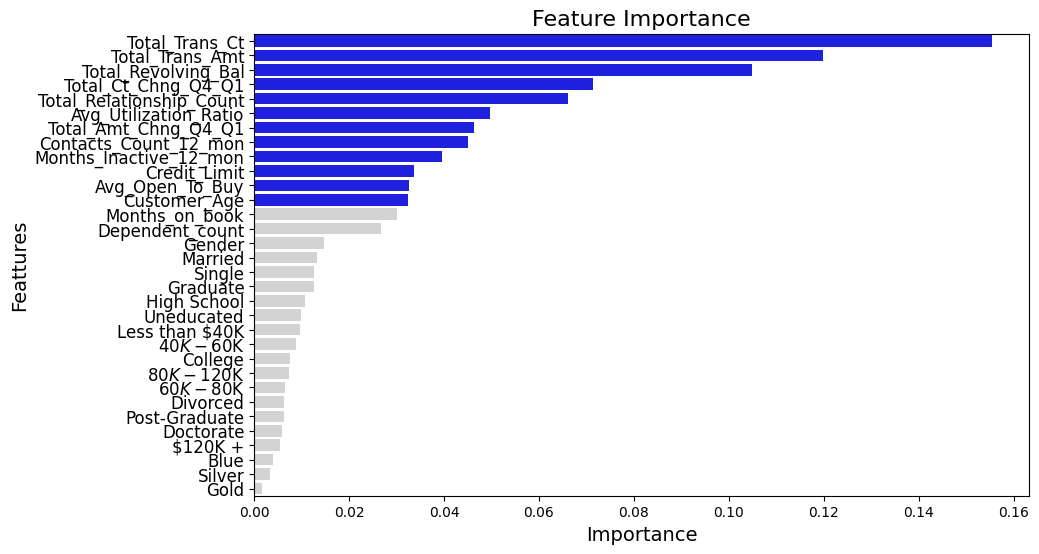

In [108]:
#Based on the analysis of the graphs, we had predicted that:
#At first glance, the following variables seem to have a significant influence on the determination of whether customers stay or not: Customer_Age, Credit_Limit,
#Total_Recovering_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio
#It seems that our intuition was correct.


import matplotlib.pyplot as plt
import seaborn as sns

#Get the indices of all columns in descending order of importance
sorted_indices = feature_importances.argsort()[::-1]

#Get the names of all columns in the same order
sorted_columns = X.columns[sorted_indices]

#Get the sorted importances
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))

#Create a bar chart to display the importance of all columns in descending order
sns.barplot(x=sorted_importances, y=sorted_columns, palette=['lightgrey' if i not in selected_feature_indices else 'blue' for i in sorted_indices])

plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feattures", fontsize=14)
plt.title("Feature Importance", fontsize=16)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [109]:
X_new.shape

(10127, 12)

In [110]:
#Model Training
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

#stratify=y: It is used to ensure that the distribution of classes in the training and test sets is similar to the original distribution 
#of the target variable y. This is particularly useful when dealing with umbalanced classes, as it ensures that both parts of the split have
#a similar proportion of each class.


In [111]:
#Verifying the size of the training and testing sets
print("Training X size: ", X_train.shape)
print("Training y size: ", y_train.shape)
print("Test X size: ", X_test.shape)
print("Test y size: ", y_test.shape)

Training X size:  (7595, 12)
Training y size:  (7595,)
Test X size:  (2532, 12)
Test y size:  (2532,)


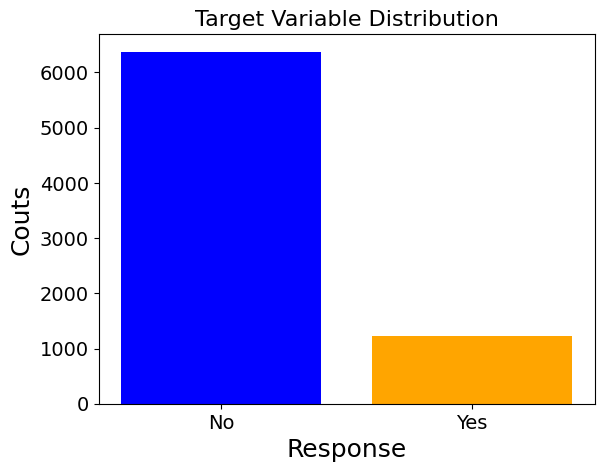

In [112]:

plt.bar(['No', 'Yes'], y_train.value_counts(), color=['blue', 'orange'])
plt.xlabel('Response', fontsize=18)
plt.ylabel('Couts', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Target Variable Distribution', fontsize=16)

plt.show()

In [113]:
#SMOTE(Synthetic Minority Oversampling Technique)
#SMOTE is a technique for oversampling the minority class. Simply adding duplicate records of the minority class often does not add new
#information to the model. In SMOTE, new instances are generated from the existing data. To put it simply, SMOTE examines instances of 
#the minority class and uses the k-nearest neighbors method to select a randomly close neighbor, and a new synthetic instance is created 
#in the feature space.

#Class imbalance, where one or more classes are significantly less frequent than others, is a common challenge in machine learning.
#The presence of minority classes can cause the model to be biased towards the majority classes and have difficulty learning patterns from 
#the minority classes. This is where techniques like SMOTE (Synthetic Minority Oversampling Technique) can help by generating synthetic
#instances to balance the classes and improve the model's performance in predicting minority classes.



from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

c:\Users\munta\OneDrive\Desktop\The Projects\DA_projects-credit-card-churn\muntadher\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\munta\OneDrive\Desktop\The Projects\DA_projects-credit-card-churn\muntadher\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


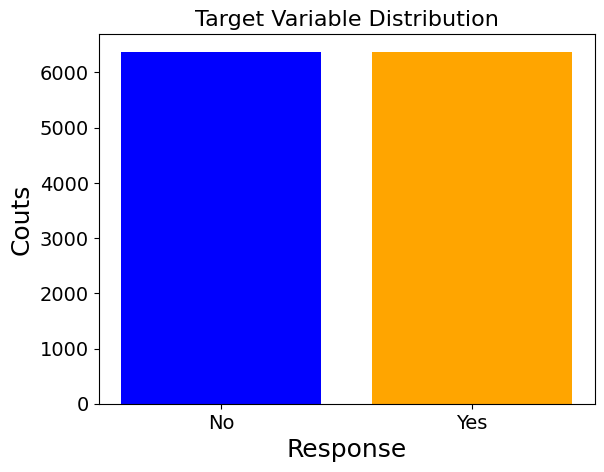

In [114]:
import matplotlib.pyplot as plt

plt.bar(['No', 'Yes'], y_train.value_counts(), color=['blue', 'orange'])
plt.xlabel('Response', fontsize=18)
plt.ylabel('Couts', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Target Variable Distribution', fontsize=16)

plt.show()

In [115]:
#Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [116]:
#Training with different models
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB())
]

model_comparison = {}  #Dictionary to store the comparison metrics of models
                    
for model_name, classifier in models:
    #Fit the model using the training set
    classifier.fit(X_train, y_train)
    #Make predictions on the test set
    y_pred = classifier.predict(X_test)
    #Calculate model metrics
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="recall")
    cv_accuracy = accuracies.mean()
    cv_std = accuracies.std()
    accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
    accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])
    #Print model metrics
    print(f"Modelo: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")
    #Add metrics to the models comparison dictionary
    model_comparison[model_name] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
    print(classification_report(y_pred, y_test, zero_division=1))
    print("-" * 60)

Modelo: Logistic Regression
Model Accuracy: 84.99%
Model F1-Score: 83.87%
Cross Val Accuracy: 87.26%
Cross Val Standard Deviation: 1.46%
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1921
           1       0.78      0.52      0.63       611

    accuracy                           0.85      2532
   macro avg       0.82      0.74      0.77      2532
weighted avg       0.84      0.85      0.84      2532

------------------------------------------------------------
Modelo: Decision Tree
Model Accuracy: 94.00%
Model F1-Score: 93.96%
Cross Val Accuracy: 95.07%
Cross Val Standard Deviation: 5.34%
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2111
           1       0.83      0.80      0.82       421

    accuracy                           0.94      2532
   macro avg       0.90      0.89      0.89      2532
weighted avg       0.94      0.94      0.94      2532

-----------------

In [118]:
#MODEL COMPARISSON
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model Accuracy-0','Model Accuracy-1','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='magma')

,Model Accuracy,Model Accuracy-0,Model Accuracy-1,Model F1-Score,CV Accuracy,CV std
Decision Tree,94.00%,96.09%,83.05%,93.96%,95.07%,5.34%
KNN,90.56%,91.44%,86.00%,90.08%,98.49%,0.45%
Logistic Regression,84.99%,86.26%,78.38%,83.87%,87.26%,1.46%
Naive Bayes,81.67%,82.78%,75.92%,80.02%,81.85%,1.69%
